In [14]:
import pandas as pd
from konlpy.tag import Okt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

df=pd.read_csv('./data/전처리_샘플뉴스.csv')

# -------------------------------------
#  데이터 전 처리
# -------------------------------------

# 1. 엔터(\n)으로 문장 분석
txt_res=[]
for i in df['text']:
    txt_res.extend(i.split('\n'))

# 2. 명사 추출
okt=Okt()
nouns=[okt.nouns(i) for i in txt_res]

# 3. stopword
stopword=['서울','밤','사회']
last_nouns=[]
for noun in nouns:
    last_nouns.append([w for w in noun if w not in stopword])

# 4. 빈 리스트 삭제
last_nouns=[i for i in last_nouns if len(i)!=0]

# 5. 전처리 완료: 
txt=[' '.join(i) for i in last_nouns]
txt



['수도권 대상 거리 두기 단계 시행 음식점 등 오후 대거 문 때문',
 '단계 시행 첫날 날 중심 가의 식당 술집 등 매장 내 취식 금지 시작 시각 오후 전후 장사 한식 집 등 식사 위주 식당 해 지면 찌 감치 마감 고깃집 횟집 이자카야 맥줏집 등 데드라인 이 임박 손님 매장 정리 시작 평소 라면 간판 불빛 불야성 번화가 골목 깜깜 정도',
 '종각역 인근 맥줏집 사장 김모 씨 오후 손님 오후 마감 달라 고 부탁 이 가게 평소 영업 시간 오후 다음 날 오전 김씨 원래 가장 시간 문 코로나 때문 매출 액 예년 로 젠 그 반토막 안 것 고 한숨',
 '오후 식당 최모 씨 친구 약속 때문 강제 이 시간 귀가 고 말 층 규모 대형 술집 단계 시행 다음 달 아예 문 이 술집 사장 오후 영업 건 그냥 술집 문 이야기 라며 포장 배달 누가 술집 술 안주 배달 말 서울역 대합실 내 한식당 등 오후 이전 문 패스트푸드 가게 일부 포장 주문 손님 눈 뿐',
 '중구 국집 사장 홍 정복 씨 원래 오후 오전 사이 매출 전체 를 차지 며 매출 액 동참 최대한 코로나 고 말',
 '업종 별로 희비 갈리 기도 온종일 포장 배달 판매 프랜차이즈 커피전문점 모습',
 '결혼식 온라인 생중계 축하 댓글 축의금 계좌 이체',
 '오후 정자동 카페 거리 로 경기도 성남시 분당구 정자동 카페 밀집 지역 스타벅스 고객 고객 발길 일쑤 매장 직원 포장 판매 설명 발길 고객 명 이상 화 고객 며 한숨',
 '곳 불과 파리 바게뜨 별천지 인석 테이블 개 중 개 손님 이 가족 지인 커피 빵 노트북 컴퓨터 이용 개인 업무 이도 제과점 음식점 마찬가지 오전 오후 현장 취식 때문 또 다른 무풍지대 인 비 프랜차이즈 소규모 개인 카페 고객 북적 소셜네트워크서비스 인기 끌 경기도 광주시 카페 낮 수용 수 층 주차장 차 상태',
 '프랜차이즈 커피전문점 중 차 안 음료 드라이브 스루 방식 매장 현장 취식 금지 대상 고객 발길 낮 경기도 남양주시 스타벅스 드라이브 스루 점포 차로 차량 대가 줄줄이 송파 나루 역 인근

## 1)  TF (Term Frequency) : 문서에서 단어가 언급된 횟수

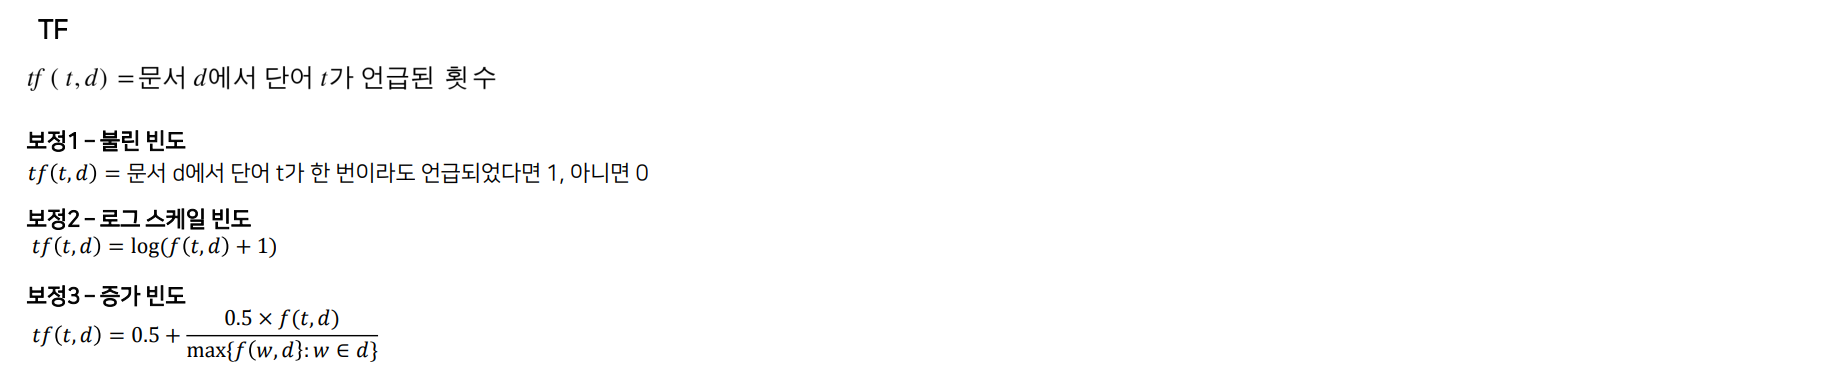

*** 문서가 너무 길거나, 단어간의 빈도수의 편차가 너무 클 경우 여러 보정을 사용함

In [15]:
# 단어 집합
word_list=sorted(list(set([n for nouns in last_nouns for n in nouns])))

#--------------------------------------------------------
# TF(Term Frequency) : 문서에서 단어가 언급된 횟수
#--------------------------------------------------------
count=[]
for i in txt:
    count.append([])
    for j in word_list:
        count[-1].append(i.count(j))

df_tf=pd.DataFrame(count,columns=word_list)
df_tf

,가건물,가게,가계,가공,가구,가까이,가동,가량,가빈,가운데,...,횟집,효과,후,후퇴,훈,휴가,휴직,흑자,희망고문,희비
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
62,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


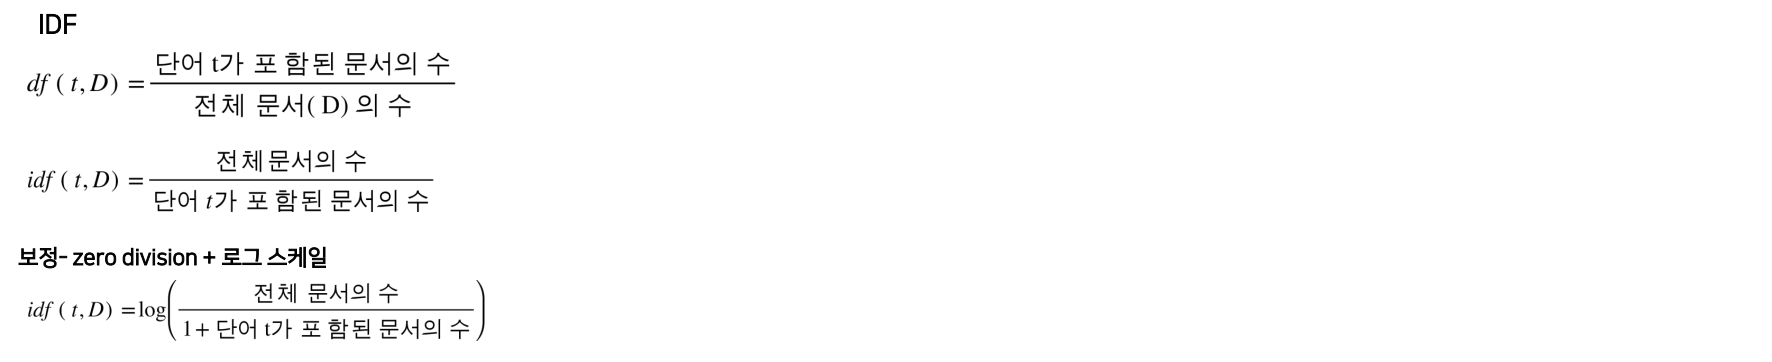

In [41]:
#--------------------------------------------------------
# IDF(Inverse Document Frequency):  역 문서 빈도
#  =>  (df)특정 단어 t가 등장하는 문서의 수의 역수
#--------------------------------------------------------

import numpy as np

D = len(df_tf) #총문서 수
df = df_tf.astype(bool).sum(axis=0)
idf = np.log(D / (df+1))



In [42]:
df_tfidf=df_tf*idf

In [43]:
df_tfidf

,가건물,가게,가계,가공,가구,가까이,가동,가량,가빈,가운데,...,횟집,효과,후,후퇴,훈,휴가,휴직,흑자,희망고문,희비
0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.054161,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,3.496508,0.0,2.108321,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,2.80336,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,3.162482,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,2.80336,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,3.162482,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.054161,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.054161,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62,0.0,0.00000,9.273127,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
63,0.0,0.00000,0.000000,0.0,0.0,3.091042,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
64,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,3.496508,0.0,0.0,0.0,0.0,0.0


## SKlearn
### 1. TF

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
tdm=cv.fit_transform(txt)

#단어 목록 확인
feature=cv.get_feature_names_out()
#tf Matrix확인
print(tdm.toarray())
# tf
tf_=pd.DataFrame(tdm.toarray(), columns=feature)
tf_

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,가건물,가게,가계,가공,가구,가까이,가동,가량,가빈,가운데,...,회사,회의,횟집,효과,후퇴,휴가,휴직,흑자,희망고문,희비
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. TF_IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer()
tfidf_matrix=tfidf_vectorizer.fit_transform(txt)
# 단어 집합 
tfidf_feature=tfidf_vectorizer.get_feature_names_out()

#TF_IDF
tfidf_=pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature)

In [37]:
tfidf_

,가건물,가게,가계,가공,가구,가까이,가동,가량,가빈,가운데,...,회사,회의,횟집,효과,후퇴,휴가,휴직,흑자,희망고문,희비
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.159872,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.173704,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.122296,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.0,0.000000,0.449992,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.000000,0.000000,0.0,0.0,0.195778,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
